# Cálculo de corriente en estado estable

In [2]:
from IEEE738 import *

V_w = 0.61
phi = 90
epsilon = 0.5
alpha = 0.5
T_a = 40
T_max = 90
D_o = 28.12e-3
Z_l = 90
lat = 43
industrial_atmosphere = False
year = 2022
month = 6
day =  11
hour = 0
H_e = 0

T_l = 25
R_l = 0.07284e-3
T_h = 75
R_h = 0.08689e-3

alpha_T  = ((R_h - R_l)/(T_h - T_l))/R_l

I = ss_thermal_rating( V_w, phi, epsilon, alpha, T_a, T_max, D_o, R_l, T_l, alpha_T, Z_l, lat, industrial_atmosphere, year, month, day, hour, H_e )

print( 'I = ', I )

I =  981.901684158688


# Cálculo de temperatura en estado estable

In [3]:

I_ss = 1000
V_w = 0.61
phi = 90
epsilon = 0.5
alpha = 0.5
T_a = 40
D_o = 28.12e-3
R_0 = 0.07284e-3
T_0 = 25
Z_l = 45
lat = 43
industrial_atmosphere = False
year = 2022
month = 6
day = 11
hour = 12
H_e = 0
es = 0.01
imax = 10000

T_l = 25
R_l = 0.07284e-3
T_h = 75
R_h = 0.08689e-3

alpha_T  = ((R_h - R_l)/(T_h - T_l))/R_l

T_avg = steady_state_conductor_temperature( I_ss, V_w, phi, epsilon, alpha, T_a, D_o, R_0, T_0, alpha_T, Z_l, lat, industrial_atmosphere, year, month, day, hour, H_e,  es, imax )
print( 'T_avg = ', T_avg )

q_s =  13.938230869214049
Número de iteraciones:  5
T_avg =  100.85798782977925


# Cálculo de transitorio de temperatura y su tiempo de establecimiento, dado un cambio discreto en la corriente

q_s =  13.938230869214049
Número de iteraciones:  4
[55.85639523193721, 60.63618217896166, 65.1251815803139, 69.33802920966441, 73.28893712107595, 76.99167888227602, 80.45957602470125, 83.7054863081789, 86.74179421527806, 89.58040393446412, 92.23273496086719, 94.70972033699822, 97.02180747108882, 99.17896140566187, 101.19067036112307, 103.06595334624463, 104.81336960709666, 106.441029676097, 107.95660778138702, 109.36735538189018, 110.68011560356899, 111.90133836618195, 113.03709600607966, 114.09309921829626, 115.07471315959616, 115.98697357260203, 116.83460280917625, 117.62202564849687, 118.35338482150979, 119.03255616848436, 119.66316337015662, 120.24859220537245, 120.7920042992468, 121.29635033567162, 121.76438271659238, 122.19866765790916, 122.6015967182265, 122.97539776206949, 123.32214536369284, 123.64377066132768, 123.94207067472408, 124.21871710124117, 124.47526460758736, 124.71315863569436, 124.93374274218417, 125.13826549151987, 125.32788692326906, 125.50368461400367, 125.666

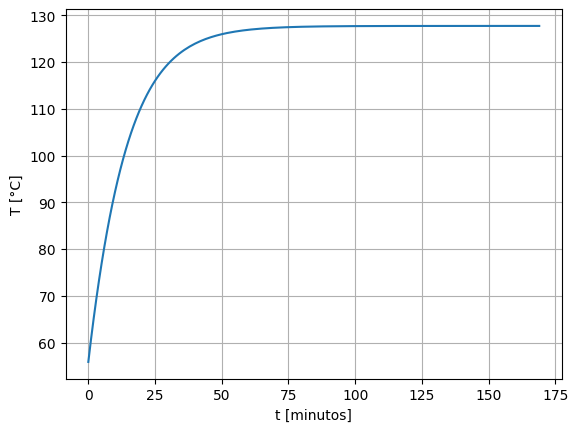

In [4]:
from numpy import arange
import matplotlib.pyplot as plt
I_i = 400
I_f = 1200
dt = 60
time = 169 * dt
V_w = 0.61
phi = 90
epsilon = 0.5
alpha = 0.5
T_a = 40
D_o = 28.12e-3
R_0 = 0.07284e-3
T_0 = 25
Z_l = 45
lat = 43
industrial_atmosphere = False
year = 2022
month = 6
day = 11
hour = 12
H_e = 0
es = 0.01
imax = 1000

T_l = 25
R_l = 0.07284e-3
T_h = 75
R_h = 0.08689e-3

alpha_T  = ((R_h - R_l)/(T_h - T_l))/R_l

mC_p = 1066 + 243.7

T = transient_conductor_temperature( I_i, I_f, dt, time, mC_p, V_w, phi, epsilon, alpha, T_a, D_o, R_0, T_0, alpha_T, Z_l, lat, industrial_atmosphere, year, month, day, hour, H_e, es, imax )
print(T)
plt.plot( arange(0, (time+dt)/60, dt/60 ), T )
plt.xlabel('t [minutos]')
plt.ylabel('T [°C]')
plt.grid(True)

dT = 1
time = transient_settling_time( I_i, I_f, dT, mC_p, V_w, phi, epsilon, alpha, T_a, D_o, R_0, T_0, alpha_T, Z_l, lat, industrial_atmosphere, year, month, day, hour, H_e, es, imax )
print('El tiempo de establecimiento es de', time, ' segundos = ', time/60, ' minutos' )
